# Robert Ritchie
## https://www.imdb.com/?ref_=nv_home

**5 Exploration Questions:**
1. What are the best pieces of media (movies, TV shows, etc.) of all time, according to IMDb?
2. What are the best comedy movies of all time?
3. What are the best action movies of all time?
4. What are the best TV shows of all time?
5. What are the best Mini Series of all time?

**Plan for Data Scraping**
Pull data from the table with class_="lister-item mode-advanced" from five different pages that are named by movie name.

The following cell installs Seaborn.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


The following cell sorts the movies/TV shows from IMDb's list of the Top 250 movies/TV shows with the most ratings. It then multiplies the number of ratings times the average rating to generate a new number that will be used to find out what is the best piece of media based on these two numbers. It then sorts the titles by this number, listing the best movies/TV shows of all time, in order, according to this new metric. The 'total rating' metric is then divided by 100,000 to make the numbers smaller and easier to understand. The top ten titles are then displayed in a bar graph.

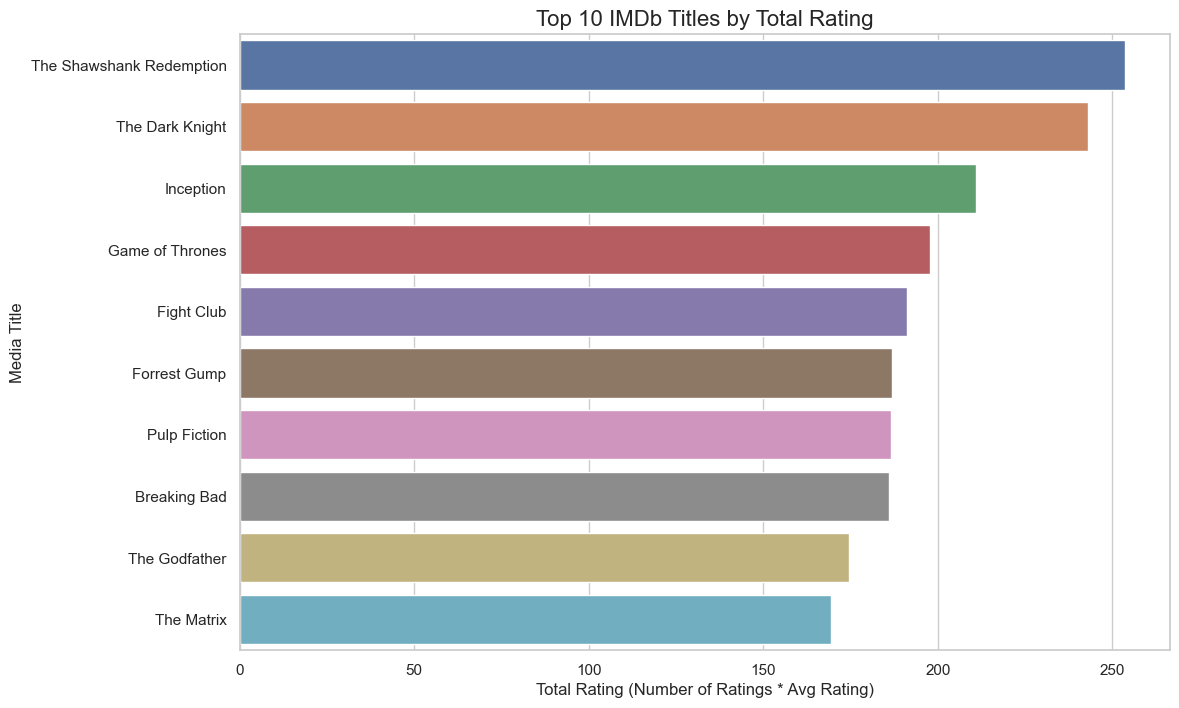

In [3]:
#import requests, Beautiful Soup, Seaborn, MatPlotLib
import requests
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt

#Get IMDb url
url = "https://www.imdb.com/search/title/?adult=include&sort=num_votes,desc&count=250"
response = requests.get(url)
status = response.status_code

#find all number of ratings and average rating data
if status == 200:
    page = response.text
    soup = bs(page, "html.parser")
    movies = soup.find_all("div", class_="lister-item mode-advanced")

#create 'Total Rating' metric
    movie_list = []
    for movie in movies:
        title = movie.h3.a.text
        rating = float(movie.find("div", class_="inline-block ratings-imdb-rating").text.strip())
        num_ratings = int(movie.find("span", attrs={"name": "nv"})["data-value"])
        total = rating * num_ratings / 100000
        movie_list.append((title, total))

#sort movies by 'Total Rating'
    sorted_movies = sorted(movie_list, key=lambda x: x[1], reverse=True)[:10]
    
    # Create a Seaborn bar plot
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(x=[m[1] for m in sorted_movies], y=[m[0] for m in sorted_movies], ax=ax)
    ax.set(xlabel="Total Rating (Number of Ratings * Avg Rating)", ylabel="Media Title")
    ax.set_title("Top 10 IMDb Titles by Total Rating", fontsize=16)
    plt.show()
else:
    print(f"Oops! Received status code {status}")


**1. What are the best pieces of media (movies, TV shows, etc.) of all time, according to IMDb?**
According to IMDb and the 'Total Rating' metric, these are the best pieces of media of all time, with 'The Shawshank Redemption' being number 1.

The following cell accomplishes the same goal as the first graph, but instead the Top Ten Comedy Movies of all time. This is based on movies that fall under the 'Comedy' genre. (Note: This only includes Feature Films. No TV movies were included.)

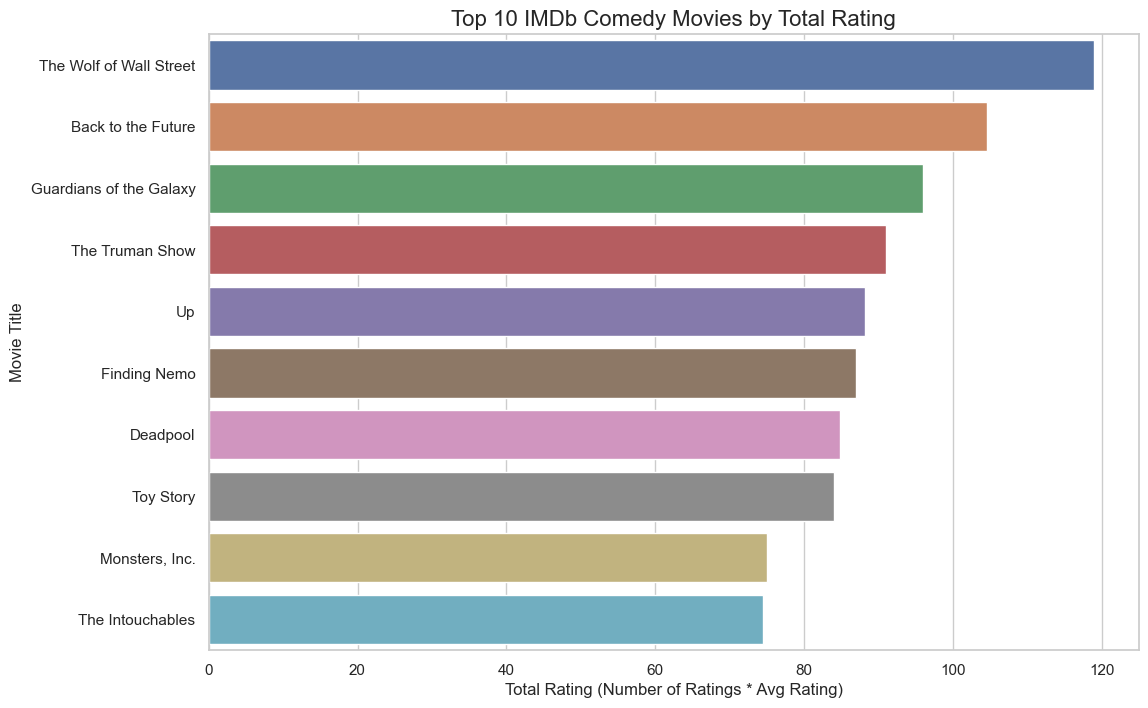

In [4]:
#Get IMDb url
url = "https://www.imdb.com/search/title/?title_type=feature&genres=comedy&sort=num_votes,desc&count=250"
response = requests.get(url)
status = response.status_code

#find all number of ratings and average rating data
if status == 200:
    page = response.text
    soup = bs(page, "html.parser")
    movies = soup.find_all("div", class_="lister-item mode-advanced")

#create 'Total Rating' metric
    movie_list = []
    for movie in movies:
        title = movie.h3.a.text
        rating = float(movie.find("div", class_="inline-block ratings-imdb-rating").text.strip())
        num_ratings = int(movie.find("span", attrs={"name": "nv"})["data-value"])
        total = rating * num_ratings / 100000
        movie_list.append((title, total))

#sort movies by 'Total Rating'
    sorted_movies = sorted(movie_list, key=lambda x: x[1], reverse=True)[:10]
    
    # Create a Seaborn bar plot
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(x=[m[1] for m in sorted_movies], y=[m[0] for m in sorted_movies], ax=ax)
    ax.set(xlabel="Total Rating (Number of Ratings * Avg Rating)", ylabel="Movie Title")
    ax.set_title("Top 10 IMDb Comedy Movies by Total Rating", fontsize=16)
    plt.show()
else:
    print(f"Oops! Received status code {status}")




**2. What are the best comedy movies of all time?**
According to IMDb and the 'Total Rating' metric, these are the Top Ten Comedy Movies of all time, with 'The Wolf of Wall Street' at number 1.

The following cell accomplishes the same goal as the first two graphs, but instead the Top Ten Action Movies of all time. This is based on movies that fall under the 'Action' genre. (Note: This only includes Feature Films. No TV movies were included.)

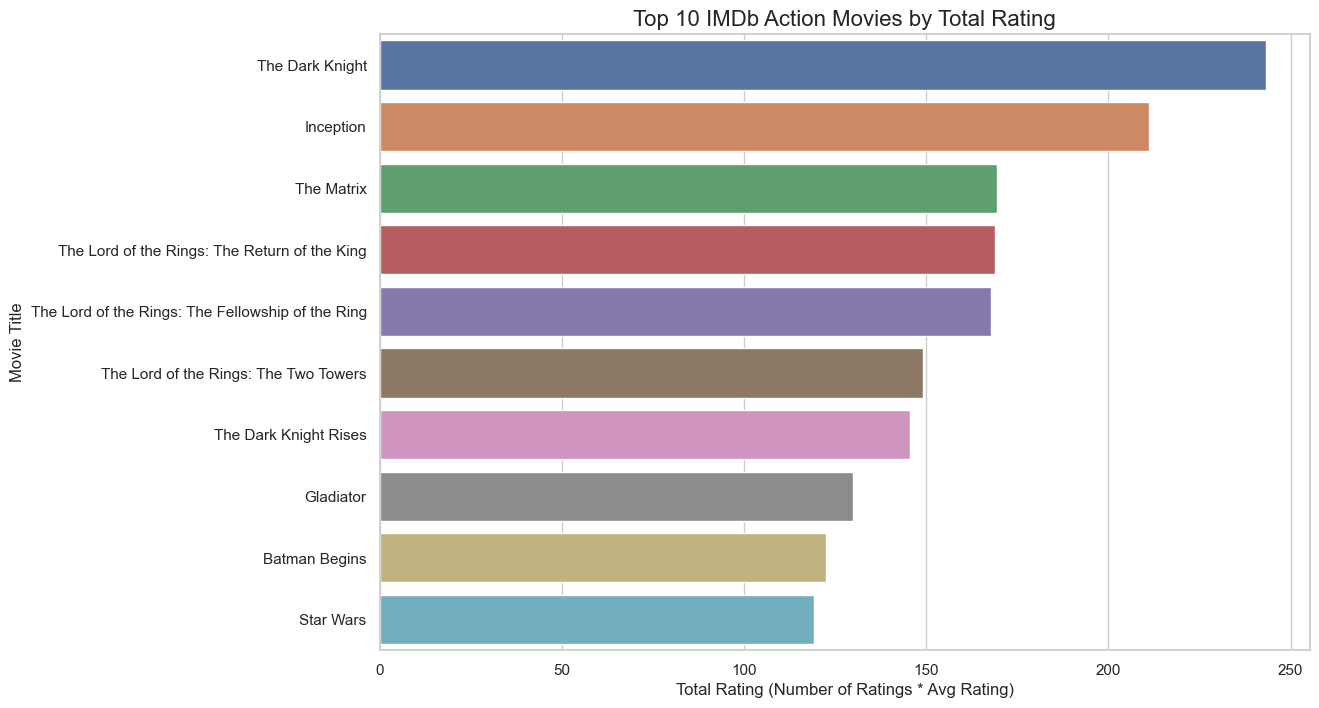

In [5]:
#Get IMDb url
url = "https://www.imdb.com/search/title/?title_type=feature&genres=action&sort=num_votes,desc&count=250"
response = requests.get(url)
status = response.status_code

#find all number of ratings and average rating data
if status == 200:
    page = response.text
    soup = bs(page, "html.parser")
    movies = soup.find_all("div", class_="lister-item mode-advanced")

#create 'Total Rating' metric
    movie_list = []
    for movie in movies:
        title = movie.h3.a.text
        rating = float(movie.find("div", class_="inline-block ratings-imdb-rating").text.strip())
        num_ratings = int(movie.find("span", attrs={"name": "nv"})["data-value"])
        total = rating * num_ratings / 100000
        movie_list.append((title, total))

#sort movies by 'Total Rating'
    sorted_movies = sorted(movie_list, key=lambda x: x[1], reverse=True)[:10]
    
    # Create a Seaborn bar plot
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(x=[m[1] for m in sorted_movies], y=[m[0] for m in sorted_movies], ax=ax)
    ax.set(xlabel="Total Rating (Number of Ratings * Avg Rating)", ylabel="Movie Title")
    ax.set_title("Top 10 IMDb Action Movies by Total Rating", fontsize=16)
    plt.show()
else:
    print(f"Oops! Received status code {status}")




**3. What are the best action movies of all time?**
According to IMDb and the 'Total Rating' metric, these are the Top Ten Action Movies of all time, with 'The Dark Knight' at number 1, as well as the other two movies (Batman Begins, The Dark Knight Rises) from that trilogy making the list.

The following cell accomplishes the same goal as the first three graphs, but instead the Top Ten TV Shows of all time.  (Note: This only includes FULL TV Series. No Mini series were included.)

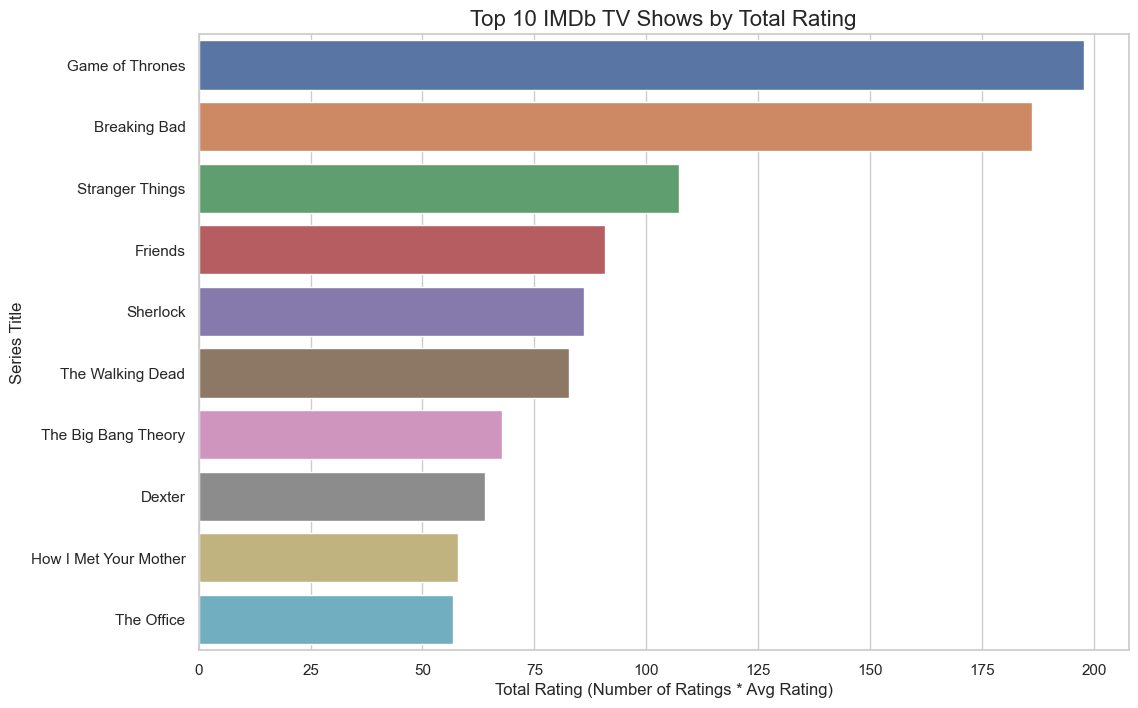

In [6]:
#Get IMDb url
url = "https://www.imdb.com/search/title/?title_type=tv_series&sort=num_votes,desc&count=250"
response = requests.get(url)
status = response.status_code

#find all number of ratings and average rating data
if status == 200:
    page = response.text
    soup = bs(page, "html.parser")
    movies = soup.find_all("div", class_="lister-item mode-advanced")

#create 'Total Rating' metric
    movie_list = []
    for movie in movies:
        title = movie.h3.a.text
        rating = float(movie.find("div", class_="inline-block ratings-imdb-rating").text.strip())
        num_ratings = int(movie.find("span", attrs={"name": "nv"})["data-value"])
        total = rating * num_ratings / 100000
        movie_list.append((title, total))

#sort movies by 'Total Rating'
    sorted_movies = sorted(movie_list, key=lambda x: x[1], reverse=True)[:10]
    
    # Create a Seaborn bar plot
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(x=[m[1] for m in sorted_movies], y=[m[0] for m in sorted_movies], ax=ax)
    ax.set(xlabel="Total Rating (Number of Ratings * Avg Rating)", ylabel="Series Title")
    ax.set_title("Top 10 IMDb TV Shows by Total Rating", fontsize=16)
    plt.show()
else:
    print(f"Oops! Received status code {status}")


**4. What are the best TV shows of all time?**
According to IMDb and the 'Total Rating' metric, these are the Top Ten TV Shows of all time, with 'Game of Thrones' and 'Breaking Bad' at the top, with a significant margin between those two shows and the rest of the list.

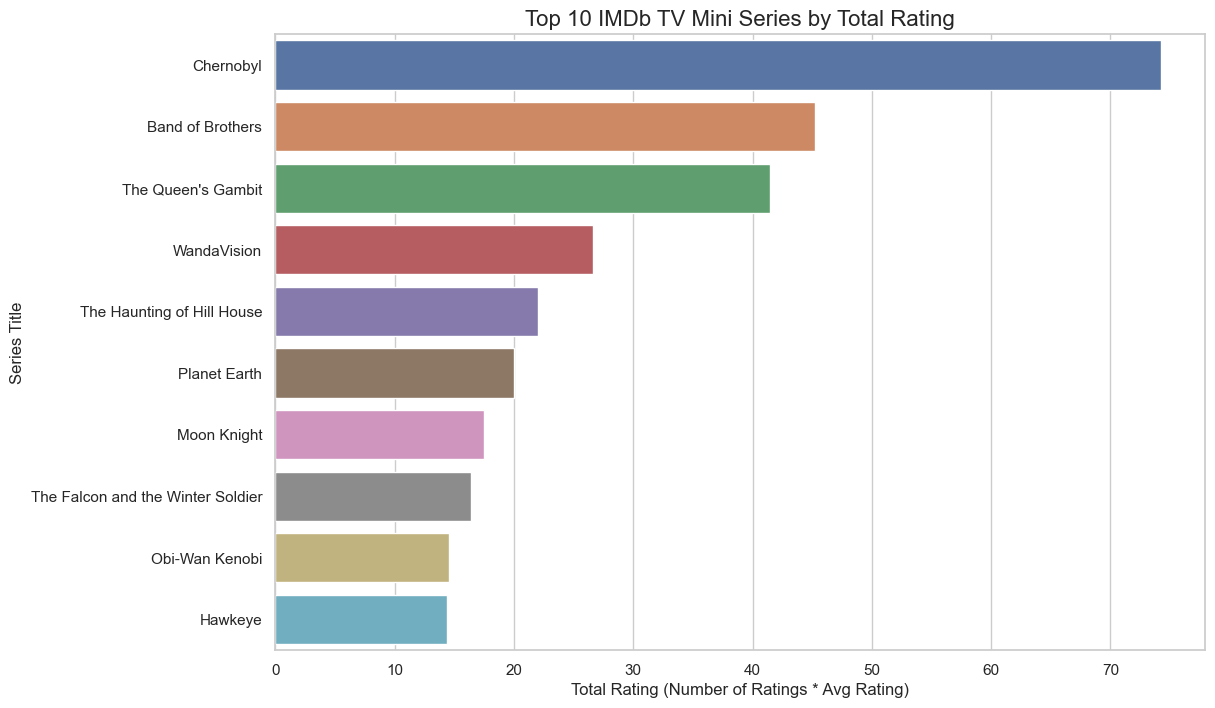

In [7]:
#Get IMDb url
url = "https://www.imdb.com/search/title/?title_type=tv_miniseries&sort=num_votes,desc&count=250"
response = requests.get(url)
status = response.status_code

#find all number of ratings and average rating data
if status == 200:
    page = response.text
    soup = bs(page, "html.parser")
    movies = soup.find_all("div", class_="lister-item mode-advanced")

#create 'Total Rating' metric
    movie_list = []
    for movie in movies:
        title = movie.h3.a.text
        rating = float(movie.find("div", class_="inline-block ratings-imdb-rating").text.strip())
        num_ratings = int(movie.find("span", attrs={"name": "nv"})["data-value"])
        total = rating * num_ratings / 100000
        movie_list.append((title, total))

#sort movies by 'Total Rating'
    sorted_movies = sorted(movie_list, key=lambda x: x[1], reverse=True)[:10]
    
    # Create a Seaborn bar plot
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(x=[m[1] for m in sorted_movies], y=[m[0] for m in sorted_movies], ax=ax)
    ax.set(xlabel="Total Rating (Number of Ratings * Avg Rating)", ylabel="Series Title")
    ax.set_title("Top 10 IMDb TV Mini Series by Total Rating", fontsize=16)
    plt.show()
else:
    print(f"Oops! Received status code {status}")


**5. What are the best TV mini-series of all time?**
According to IMDb and the 'Total Rating' metric, these are the best Mini Series of all time, with 'Chernobyl' at the top. Chernobyl has a significant lead over the second best mini series, 'Band of Brothers'.